# Complexity Measures

Words, words, words.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from neurodsp.sim import sim_powerlaw, sim_synaptic_current, sim_combined
from neurodsp.utils import set_random_seed

from antropy import hjorth_params
from antropy import higuchi_fd, petrosian_fd, katz_fd

In [2]:
# Import custom code
import sys; from pathlib import Path
sys.path.append(str(Path('..').resolve()))

from apm.run import run_sims
from apm.plts import plot_lines
from apm.plts.settings import AP_COL, COMB_COL

## Functions

In [3]:
# Note: to be added to neurodsp
def convert_exp_fd(exp):
    """Convert exponent to expected Higuchi fractal dimension value.
    
    Parameters
    ----------
    exp : float
        Exponent value. 
    
    Returns
    -------
    float
        Predicted Higuchi fractal dimension value.
    
    Notes
    -----
    This works for exponents between {1, 3} (inclusive).
    As a special case, if exp is 0, D is 2. 
        if exp is 3, D is 1
        
    References
    ----------
    From F Cervantes-De la Torre et al, 2013
    """
    
    if exp == 0:
        out = 2
    elif exp >= 1 and exp <= 3:
        out = (5 - exp) / 2
    else:
        msg = 'Conversion not supported for given exponent value. '
        raise ValueError(msg)
    
    return out

## Settings

In [4]:
# Simulation settings
n_seconds = 30
fs = 1000
default_exp = -2
default_freq = 10

# Collect together simulation parameters
sim_params_pow = {'n_seconds' : n_seconds, 'fs' : fs}

sim_params_comb = {'n_seconds' : n_seconds, 'fs' : fs,
                   'components' : {'sim_powerlaw' : {'exponent' : default_exp},
                                   'sim_oscillation' : {'freq' : default_freq}}}

In [5]:
# Set the number of instances to run
n_instances = 50

# Set the exponent range to simulate across
exps = np.arange(-3, 0.25, 0.25)
freqs = np.arange(1, 50, 2)
pows = np.arange(0, 1, 0.1)

In [6]:
# Set the random seed
set_random_seed(111)

In [7]:
# Notebooks
SAVE_FIG = False

## Complexity

Words, words, words

In [8]:
def hjorth_mobility_wrapper(sig):
    """Wrapper function for computing and getting Hjorth mobility."""
    return hjorth_params(sig)[0]

def hjorth_complexity_wrapper(sig):
    """Wrapper function for computing and getting Hjorth complexity."""
    return hjorth_params(sig)[1]

## Hjorth Parameters on Examples Signals

#### Powerlaw Signal

In [9]:
# Simulate a powerlaw signal
sig_pl = sim_powerlaw(n_seconds, fs, default_exp)

# Calculate Hjorth parameters on the simulated signal
mobility, complexity = hjorth_params(sig_pl)

# Check the calculated Hjorth parameters
print('Mobility: \t\t {:1.4f}'.format(mobility))
print('Complexity: \t\t {:1.4f}'.format(complexity))

Mobility: 		 0.0096
Complexity: 		 134.4964


#### Combined Signal

In [10]:
# Simulate a combined signal
sig_comb = sim_powerlaw(**sim_params_comb)

# Calculate Hjorth parameters on the simulated signal
mobility, complexity = hjorth_params(sig_comb)

# Check the calculated Hjorth parameters
print('Mobility: \t\t {:1.4f}'.format(mobility))
print('Complexity: \t\t {:1.4f}'.format(complexity))

Mobility: 		 0.0294
Complexity: 		 44.0149


#### Knee Signal

In [11]:
# Simulate a signal with a knee
sig_kn = sim_synaptic_current(n_seconds, fs)

# Calculate Hjorth parameters on the simulated signal
mobility, complexity = hjorth_params(sig_kn)

# Check the calculated Hjorth parameters
print('Mobility: \t\t {:1.4f}'.format(mobility))
print('Complexity: \t\t {:1.4f}'.format(complexity))

Mobility: 		 0.4304
Complexity: 		 3.3523


### Hjorth Parameters: Aperiodic Variations

In [12]:
# Run a set of simulations, calculating Hjorth measures across exponents
hjm_sims_exp = run_sims(sim_powerlaw, sim_params_pow, hjorth_mobility_wrapper, {},
                        update='update_exp', values=exps, n_instances=n_instances)

hjc_sims_exp = run_sims(sim_powerlaw, sim_params_pow, hjorth_complexity_wrapper, {},
                        update='update_exp', values=exps, n_instances=n_instances)

In [13]:
# Run a set of simulations, calculating Hjorth measures across exponents with an oscillation
hjm_sims_comb = run_sims(sim_combined, sim_params_comb, hjorth_mobility_wrapper, {},
                         update='update_comb_exp', values=exps, n_instances=n_instances)

hjc_sims_comb = run_sims(sim_combined, sim_params_comb, hjorth_complexity_wrapper, {},
                         update='update_comb_exp', values=exps, n_instances=n_instances)

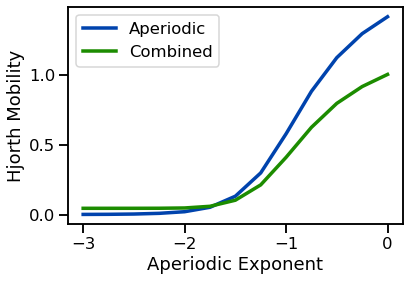

In [14]:
# Plot Hjorth mobility across exponents
plot_lines(exps, hjm_sims_exp, color=AP_COL, label='Aperiodic')
plot_lines(exps, hjm_sims_comb, color=COMB_COL, label='Combined')
plot_lines(xlabel='Aperiodic Exponent', ylabel='Hjorth Mobility')
plot_lines(save_fig=SAVE_FIG, file_name='hjm_both', file_path='complexity')

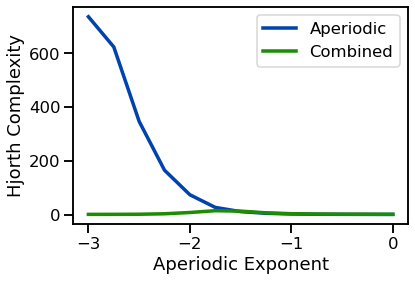

In [15]:
# Plot Hjorth complexity across exponents
plot_lines(exps, hjc_sims_exp, color=AP_COL, label='Aperiodic')
plot_lines(exps, hjc_sims_comb, color=COMB_COL, label='Combined')
plot_lines(xlabel='Aperiodic Exponent', ylabel='Hjorth Complexity')
plot_lines(save_fig=SAVE_FIG, file_name='hjc_both', file_path='complexity')

### Hjorth Parameters: Periodic Variations

In [16]:
# Run a set of simulations, calculating fractal dimension across oscillation frequency
hjm_sims_freq = run_sims(sim_combined, sim_params_comb, hjorth_mobility_wrapper, {},
                         update='update_freq', values=freqs, n_instances=n_instances)

hjc_sims_freq = run_sims(sim_combined, sim_params_comb, hjorth_complexity_wrapper, {},
                         update='update_freq', values=freqs, n_instances=n_instances)

In [17]:
# Run a set of simulations, calculating fractal dimension across oscillation power
hjm_sims_pow = run_sims(sim_combined, sim_params_comb, hjorth_mobility_wrapper, {},
                        update='update_pow', values=freqs, n_instances=n_instances)

hjc_sims_pow = run_sims(sim_combined, sim_params_comb, hjorth_complexity_wrapper, {},
                        update='update_pow', values=freqs, n_instances=n_instances)

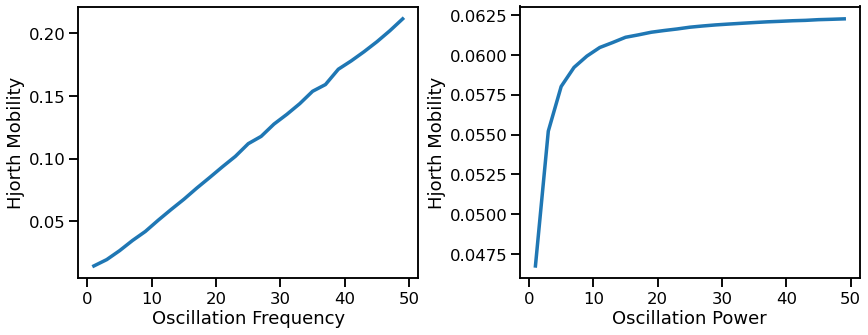

In [18]:
# Plot effect of oscillation variation on Hjorth mobility
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
plot_lines(freqs, hjm_sims_freq, ax=axes[0])
plot_lines(xlabel='Oscillation Frequency', ylabel='Hjorth Mobility', ax=axes[0])
plot_lines(freqs, hjm_sims_pow, ax=axes[1])
plot_lines(xlabel='Oscillation Power', ylabel='Hjorth Mobility', ax=axes[1])
plt.subplots_adjust(wspace=0.3)
plot_lines(save_fig=SAVE_FIG, file_name='hjm_osc_both', file_path='complexity')

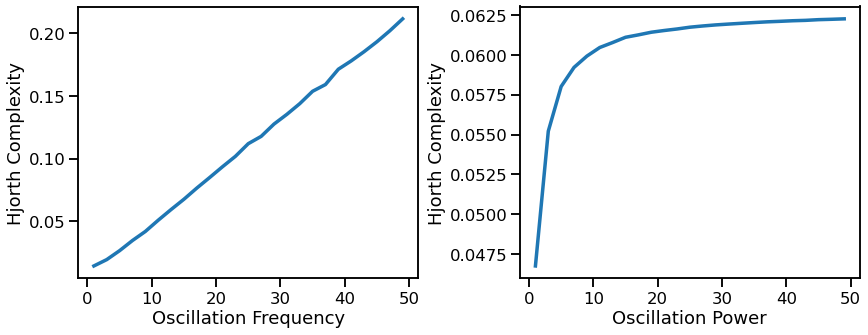

In [19]:
# Plot effect of oscillation variation on Hjorth complexity
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
plot_lines(freqs, hjm_sims_freq, ax=axes[0])
plot_lines(xlabel='Oscillation Frequency', ylabel='Hjorth Complexity', ax=axes[0])
plot_lines(freqs, hjm_sims_pow, ax=axes[1])
plot_lines(xlabel='Oscillation Power', ylabel='Hjorth Complexity', ax=axes[1])
plt.subplots_adjust(wspace=0.3)
plot_lines(save_fig=SAVE_FIG, file_name='hjc_osc_both', file_path='complexity')

## Fractal Dimensions

Calculate measures of fractal dimension on time series. 

Current messsy code below copies implementations:
- Higuchi Fractal Dimension
- Petrosian Fractal Dimension
- Katz Fractal Dimension

### Calculating Fractal Dimension on Example Signals

#### Powerlaw Signal

In [20]:
# Simulate a powerlaw signal
sig_pl = sim_powerlaw(n_seconds, fs, exponent=default_exp)

In [21]:
# Calculate fractal measures on the simulated signal
h_frac = higuchi_fd(sig_pl)
k_frac = katz_fd(sig_pl)
p_frac = petrosian_fd(sig_pl)

In [22]:
# Check the calculated fractal dimension measures
print('Higuchi   FD: \t\t {:1.4f}'.format(h_frac))
print('Expected Value: \t {:1.4f}'.format(convert_exp_fd(-default_exp)))
print('')
print('Katz      FD: \t\t {:1.4f}'.format(k_frac))
print('Petrosian FD: \t\t {:1.4f}'.format(p_frac))

Higuchi   FD: 		 1.4606
Expected Value: 	 1.5000

Katz      FD: 		 2.1364
Petrosian FD: 		 1.0162


### Combined Signal

In [23]:
# Simulate a combined signal
sig_comb = sim_powerlaw(**sim_params_comb)

In [24]:
# Calculate fractal measures on the simulated signal
h_frac = higuchi_fd(sig_comb)
k_frac = katz_fd(sig_comb)
p_frac = petrosian_fd(sig_comb)

In [25]:
# Check the calculated fractal dimension measures
print('Higuchi   FD: \t\t {:1.4f}'.format(h_frac))
print('Katz      FD: \t\t {:1.4f}'.format(k_frac))
print('Petrosian FD: \t\t {:1.4f}'.format(p_frac))

#print('Expected Value: \t\t {:1.4f}'.format(0.5))

Higuchi   FD: 		 1.4568
Katz      FD: 		 1.8228
Petrosian FD: 		 1.0163


### Knee Signal

In [26]:
# Simulate a signal with a knee
sig_kn = sim_synaptic_current(n_seconds, fs)

In [27]:
# Calculate fractal measures on the simulated signal
h_frac = higuchi_fd(sig_kn)
k_frac = katz_fd(sig_kn)
p_frac = petrosian_fd(sig_kn)

In [28]:
# Check the calculated fractal dimension measures
print('Higuchi   FD: \t\t {:1.4f}'.format(h_frac))
print('Katz      FD: \t\t {:1.4f}'.format(k_frac))
print('Petrosian FD: \t\t {:1.4f}'.format(p_frac))

#print('Expected Value: \t\t {:1.4f}'.format(0.5))

Higuchi   FD: 		 1.5918
Katz      FD: 		 4.1054
Petrosian FD: 		 1.0186


## Fracal Dimension: Aperiodic Variations

In [29]:
# Run a set of simulations, calculating fractal dimension across exponents
hfd_sims_exp = run_sims(sim_powerlaw, sim_params_pow, higuchi_fd, {},
                        update='update_exp', values=exps, n_instances=n_instances)

kfd_sims_exp = run_sims(sim_powerlaw, sim_params_pow, katz_fd, {},
                        update='update_exp', values=exps, n_instances=n_instances)

pfd_sims_exp = run_sims(sim_powerlaw, sim_params_pow, petrosian_fd, {},
                        update='update_exp', values=exps, n_instances=n_instances)

In [30]:
# Run a set of simulations, calculating fractal dimension across exponents
hfd_sims_comb = run_sims(sim_combined, sim_params_comb, higuchi_fd, {},
                         update='update_comb_exp', values=exps, n_instances=n_instances)

kfd_sims_comb = run_sims(sim_combined, sim_params_comb, katz_fd, {},
                         update='update_comb_exp', values=exps, n_instances=n_instances)

pfd_sims_comb = run_sims(sim_combined, sim_params_comb, petrosian_fd, {},
                         update='update_comb_exp', values=exps, n_instances=n_instances)

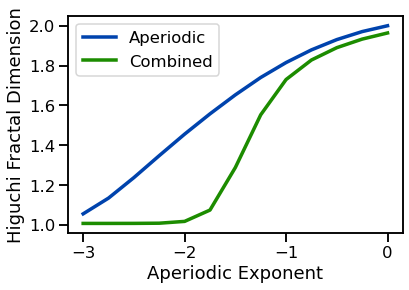

In [31]:
# Plot Higuchi fractal dimension measures
plot_lines(exps, hfd_sims_exp, color=AP_COL, label='Aperiodic')
plot_lines(exps, hfd_sims_comb, color=COMB_COL, label='Combined')
plot_lines(xlabel='Aperiodic Exponent', ylabel='Higuchi Fractal Dimension')
plot_lines(save_fig=SAVE_FIG, file_name='hfd_both', file_path='complexity')

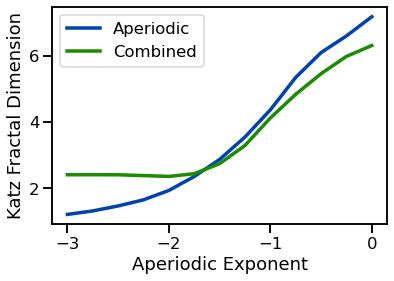

In [32]:
# Plot Katz fractal dimension measures
plot_lines(exps, kfd_sims_exp, color=AP_COL, label='Aperiodic')
plot_lines(exps, kfd_sims_comb, color=COMB_COL, label='Combined')
plot_lines(xlabel='Aperiodic Exponent', ylabel='Katz Fractal Dimension')
plot_lines(save_fig=SAVE_FIG, file_name='kfd_both', file_path='complexity')

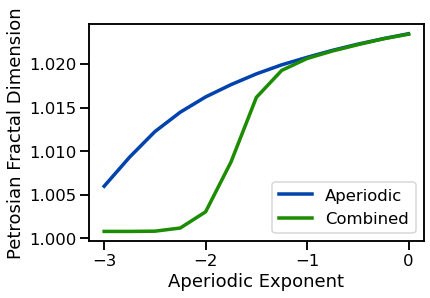

In [33]:
# Plot Petrosian fractal dimension measures
plot_lines(exps, pfd_sims_exp, color=AP_COL, label='Aperiodic')
plot_lines(exps, pfd_sims_comb, color=COMB_COL, label='Combined')
plot_lines(xlabel='Aperiodic Exponent', ylabel='Petrosian Fractal Dimension')
plot_lines(save_fig=SAVE_FIG, file_name='pfd_both', file_path='complexity')

## Fracal Dimension: Periodic Variations

In [34]:
# Run a set of simulations, calculating fractal dimension across oscillation frequency
hfd_sims_freq = run_sims(sim_combined, sim_params_comb, higuchi_fd, {},
                         update='update_freq', values=freqs, n_instances=n_instances)

kfd_sims_freq = run_sims(sim_combined, sim_params_comb, katz_fd, {},
                         update='update_freq', values=freqs, n_instances=n_instances)

pfd_sims_freq = run_sims(sim_combined, sim_params_comb, petrosian_fd, {},
                         update='update_freq', values=freqs, n_instances=n_instances)

In [35]:
# Run a set of simulations, calculating fractal dimension across oscillation power
hfd_sims_pow = run_sims(sim_combined, sim_params_comb, higuchi_fd, {},
                        update='update_pow', values=freqs, n_instances=n_instances)

kfd_sims_pow = run_sims(sim_combined, sim_params_comb, katz_fd, {},
                        update='update_pow', values=freqs, n_instances=n_instances)

pfd_sims_pow = run_sims(sim_combined, sim_params_comb, petrosian_fd, {},
                        update='update_pow', values=freqs, n_instances=n_instances)

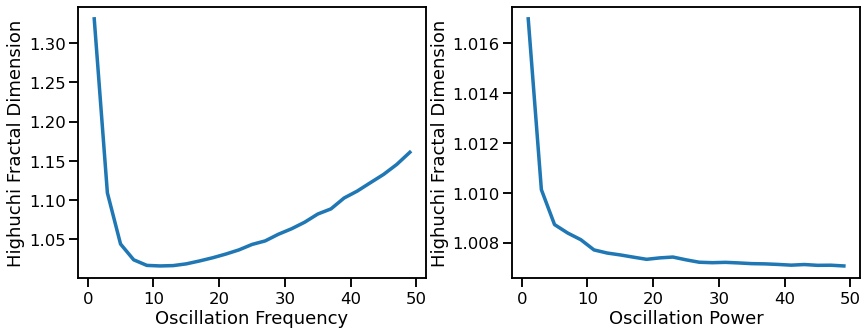

In [36]:
# Plot effect of oscillation variation on Higuchi fractal dimension
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
plot_lines(freqs, hfd_sims_freq, ax=axes[0])
plot_lines(xlabel='Oscillation Frequency', ylabel='Highuchi Fractal Dimension', ax=axes[0])
plot_lines(freqs, hfd_sims_pow, ax=axes[1])
plot_lines(xlabel='Oscillation Power', ylabel='Highuchi Fractal Dimension', ax=axes[1])
plt.subplots_adjust(wspace=0.25)
plot_lines(save_fig=SAVE_FIG, file_name='hfd_osc_both', file_path='complexity')

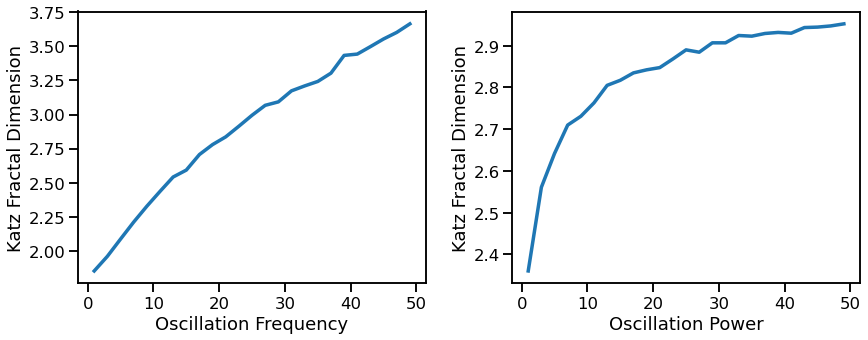

In [37]:
# Plot effect of oscillation variation on Katz fractal dimension
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
plot_lines(freqs, kfd_sims_freq, ax=axes[0])
plot_lines(xlabel='Oscillation Frequency', ylabel='Katz Fractal Dimension', ax=axes[0])
plot_lines(freqs, kfd_sims_pow, ax=axes[1])
plot_lines(xlabel='Oscillation Power', ylabel='Katz Fractal Dimension', ax=axes[1])
plt.subplots_adjust(wspace=0.25)
plot_lines(save_fig=SAVE_FIG, file_name='kfd_osc_both', file_path='complexity')

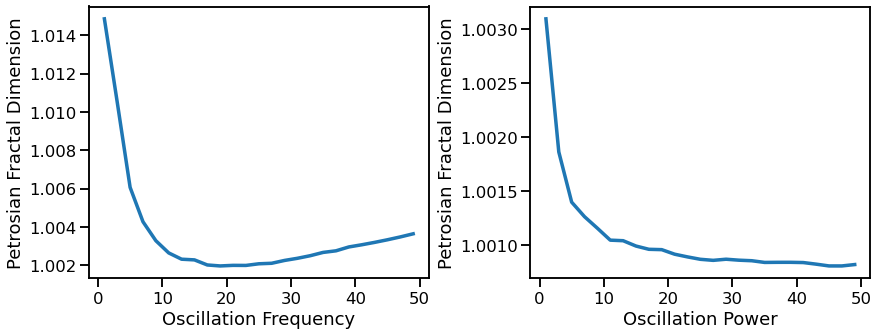

In [38]:
# Plot effect of oscillation variation on Petrosian fractal dimension
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
plot_lines(freqs, pfd_sims_freq, ax=axes[0])
plot_lines(xlabel='Oscillation Frequency', ylabel='Petrosian Fractal Dimension', ax=axes[0])
plot_lines(freqs, pfd_sims_pow, ax=axes[1])
plot_lines(xlabel='Oscillation Power', ylabel='Petrosian Fractal Dimension', ax=axes[1])
plt.subplots_adjust(wspace=0.3)
plot_lines(save_fig=SAVE_FIG, file_name='pfd_osc_both', file_path='complexity')